<a href="https://colab.research.google.com/github/pritam17/MyProject1/blob/master/TensorFlow_2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
#there are two kinds of numeric objects : constants and variables

In [0]:
a = tf.constant(3)

In [0]:
b = tf.Variable(5)

In [0]:
a

<tf.Tensor: id=14, shape=(), dtype=int32, numpy=3>

In [0]:
b

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>

In [0]:
a-b

<tf.Tensor: id=24, shape=(), dtype=int32, numpy=-2>

In [0]:
c=a*b

In [0]:
c

<tf.Tensor: id=28, shape=(), dtype=int32, numpy=15>

In [0]:
b**2

<tf.Tensor: id=31, shape=(), dtype=int32, numpy=25>

In [0]:
b=b+2

In [0]:
b

<tf.Tensor: id=34, shape=(), dtype=int32, numpy=7>

In [0]:
b=tf.Variable(3)

In [0]:
#how to update the values of variables and still keep it a variable ? 

In [0]:
b.assign(21)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=21>

In [0]:
b.assign_add(6)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=27>

In [0]:
b.assign_sub(8)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=19>

In [0]:
#for doing numpy operations extract numpy values out of tensors

In [0]:
a.numpy(),b.numpy()

(3, 19)

In [0]:
#matrix multiplication in tensorflow

In [0]:
a = tf.constant([2,45,5,4,1,5],shape=[2,3])

In [0]:
a

<tf.Tensor: id=57, shape=(2, 3), dtype=int32, numpy=
array([[ 2, 45,  5],
       [ 4,  1,  5]], dtype=int32)>

In [0]:
b = tf.constant([2,4,5,8,1,1],shape=[3,2])

In [0]:
a@b

<tf.Tensor: id=61, shape=(2, 2), dtype=int32, numpy=
array([[234, 373],
       [ 18,  29]], dtype=int32)>

In [0]:
tf.matmul(a,b)

<tf.Tensor: id=62, shape=(2, 2), dtype=int32, numpy=
array([[234, 373],
       [ 18,  29]], dtype=int32)>

In [0]:
b = tf.constant([1,6,5,4,1,5],shape=[2,3])

In [0]:
#b.T

In [0]:
b.numpy().T
#tf.convert_to_tensor

array([[1, 4],
       [6, 1],
       [5, 5]], dtype=int32)

In [0]:
a@b.numpy().T

<tf.Tensor: id=67, shape=(2, 2), dtype=int32, numpy=
array([[297,  78],
       [ 35,  42]], dtype=int32)>

In [0]:
a@tf.linalg.matrix_transpose(b)

<tf.Tensor: id=70, shape=(2, 2), dtype=int32, numpy=
array([[297,  78],
       [ 35,  42]], dtype=int32)>

In [0]:
tf.matmul(a,b,transpose_b=True)

<tf.Tensor: id=71, shape=(2, 2), dtype=int32, numpy=
array([[297,  78],
       [ 35,  42]], dtype=int32)>

In [0]:
###Gradients in Tensorflow

In [0]:
def f(x):
  return x**2+2*x+tf.math.cos(x)

In [0]:
f(1.0)

<tf.Tensor: id=75, shape=(), dtype=float32, numpy=3.5403023>

In [0]:
x= tf.Variable(0,dtype='float32')
with tf.GradientTape() as g:
  y=f(x)

In [0]:
a=g.gradient(y,x)

In [0]:
a

<tf.Tensor: id=104, shape=(), dtype=float32, numpy=2.0>

In [0]:
g.gradient(y,x)

RuntimeError: ignored

In [0]:
x_vals=[]
f_x=[]
df_dx=[]
for i in range(100):
  with tf.GradientTape() as g:
    y=f(x)
  x.assign_add(0.5)
  x_vals.append(x.numpy())
  f_x.append(f(x).numpy())
  df_dx.append(g.gradient(y,x))

In [0]:
import seaborn as sns
%matplotlib inline
import pandas as pd

In [0]:
data=pd.DataFrame({'x_vals':x_vals,'f':f_x,'grads':df_dx})

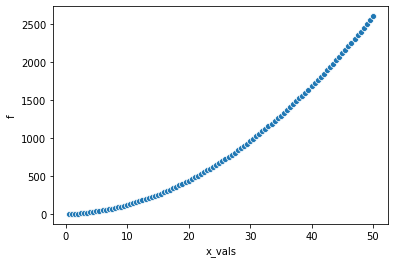

In [0]:
sns.scatterplot(data['x_vals'],data['f'])

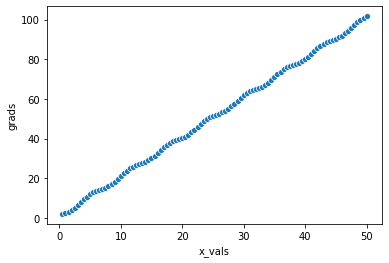

In [0]:
sns.scatterplot(data['x_vals'],data['grads'])
